In [1]:
from sklearn.externals import joblib # to save model

from P300.data import load_data

# confusion matrix
from sklearn import metrics
# http://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html


import matplotlib.pyplot as plt
%matplotlib inline 


%load_ext autoreload
%autoreload 2

import numpy as np

In [2]:
# load classifier

model_folder = 'model'
subject='AandB'
num_ch=64
clf_filename="{}/{}_LR_ch{}.model".format(model_folder, subject, num_ch)
clf = joblib.load(clf_filename)
print(clf)


LogisticRegression(C=1.0, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=-1, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


In [6]:
# load data A
subject='A'
X_train, Y_train, Code_train = load_data(subject, 'train', 85)
X_test, Y_test, Code_test = load_data(subject, 'test', 100)

loaded:
(85, 180, 896)
(85, 180, 1)
(85, 180, 1)
stacked:
(15300, 896)
(15300,)
(15300,)
loaded:
(100, 180, 896)
(100, 180, 1)
(100, 180, 1)
stacked:
(18000, 896)
(18000,)
(18000,)


In [8]:
clf.score(X_train, Y_train)

0.7241830065359477

In [9]:
clf.score(X_test, Y_test)

0.7098333333333333

## calc log prob

In [11]:
log_prob=clf.predict_log_proba(X_train)
log_prob_diff = log_prob[:,1]-log_prob[:,0]
log_prob_diff.shape

(15300,)

In [18]:
print(sum(log_prob_diff>0))
print(sum(log_prob_diff<0))

5246
10054


(array([2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 4.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 2.000e+00, 2.000e+00,
        1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 2.000e+00,
        5.000e+00, 1.500e+01, 3.700e+01, 1.350e+02, 3.290e+02, 8.000e+02,
        1.644e+03, 2.553e+03, 3.006e+03, 2.706e+03, 1.973e+03, 1.146e+03,
        5.510e+02, 2.280e+02, 7.600e+01, 2.300e+01, 1.000e+01, 8.000e+00,
        4.000e+00, 2.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+0

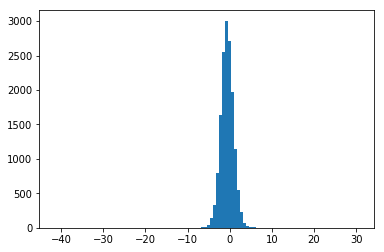

In [19]:
plt.hist(log_prob_diff,bins=100 )

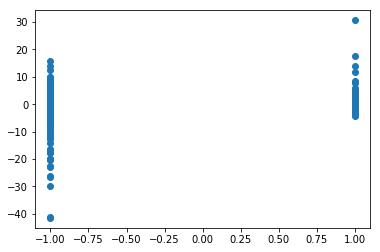

In [20]:
plt.plot(Y_train,log_prob_diff,'o')

## fine tune with data A